# ITLDM801 - DATA MINING AND DATA WAREHOUSING
## CAT Scenario- Rwanda Polytechnic Graduates Classification 

---
## Step 1: Load the CSV using pandas

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import math
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('rp_students_20000.csv')
print('Dataset loaded successfully.')
print(f'Shape: {df.shape}')
df.head(10)

Dataset loaded successfully.
Shape: (20000, 10)


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class
0,RP10651,59,51,51,53,51,50,315,52.500000,Lower Class
1,RP02042,7,13,39,2,9,12,82,13.666667,Fail
2,RP08669,50,56,54,51,57,59,327,54.500000,Lower Class
3,RP01115,14,6,7,4,27,20,78,13.000000,Fail
4,RP13903,68,62,63,69,69,61,392,65.333333,Second Class
5,RP11964,55,52,53,58,58,57,333,55.500000,Lower Class
6,RP11073,55,52,56,55,51,56,325,54.166667,Lower Class
7,RP03003,32,4,34,21,34,27,152,25.333333,Fail
8,RP19772,91,87,81,90,84,95,528,88.000000,First Class
9,RP08116,56,54,53,56,57,58,334,55.666667,Lower Class


---
## Step 2: Display first and last five records, dataset information, and statistical summary

In [27]:
print('=== FIRST 5 RECORDS ===')
display(df.head(5))

print('\n=== LAST 5 RECORDS ===')
display(df.tail(5))

print('\n=== DATASET INFORMATION ===')
df.info()

print('\n=== STATISTICAL SUMMARY ===')
display(df.describe())

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

=== FIRST 5 RECORDS ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class
0,RP10651,59,51,51,53,51,50,315,52.500000,Lower Class
1,RP02042,7,13,39,2,9,12,82,13.666667,Fail
2,RP08669,50,56,54,51,57,59,327,54.500000,Lower Class
3,RP01115,14,6,7,4,27,20,78,13.000000,Fail
4,RP13903,68,62,63,69,69,61,392,65.333333,Second Class



=== LAST 5 RECORDS ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class
19995,RP11285,56,51,55,52,55,57,326,54.333333,Lower Class
19996,RP11965,53,54,52,54,55,58,326,54.333333,Lower Class
19997,RP05391,49,47,47,40,45,44,272,45.333333,Pass Class
19998,RP00861,15,1,11,33,14,3,77,12.833333,Fail
19999,RP15796,65,61,64,68,68,69,395,65.833333,Second Class



=== DATASET INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            20000 non-null  object 
 1   Machine_learning      20000 non-null  int64  
 2   Data_mining           20000 non-null  int64  
 3   Cyber_security        20000 non-null  int64  
 4   Software_engineering  20000 non-null  int64  
 5   Research_methodology  20000 non-null  int64  
 6   Blockchain            20000 non-null  int64  
 7   Total_Score           20000 non-null  int64  
 8   Percentage            20000 non-null  float64
 9   Class                 20000 non-null  object 
dtypes: float64(1), int64(7), object(2)
memory usage: 1.5+ MB

=== STATISTICAL SUMMARY ===


,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,53.62615,53.577800,53.530600,53.617500,53.649800,53.601900,321.603750,53.600625
std,22.76391,22.789781,22.764456,22.761032,22.909162,22.810194,131.490449,21.915075
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,3.333333
25%,42.00000,42.000000,42.000000,42.000000,42.000000,42.000000,262.000000,43.666667
50%,54.00000,55.000000,54.000000,55.000000,55.000000,54.000000,327.000000,54.500000
75%,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000,392.000000,65.333333
max,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,587.000000,97.833333



=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class
0,RP10651,59,51,51,53,51,50,315,52.500000,Lower Class
1,RP02042,7,13,39,2,9,12,82,13.666667,Fail
2,RP08669,50,56,54,51,57,59,327,54.500000,Lower Class
3,RP01115,14,6,7,4,27,20,78,13.000000,Fail
4,RP13903,68,62,63,69,69,61,392,65.333333,Second Class
5,RP11964,55,52,53,58,58,57,333,55.500000,Lower Class
6,RP11073,55,52,56,55,51,56,325,54.166667,Lower Class
7,RP03003,32,4,34,21,34,27,152,25.333333,Fail
8,RP19772,91,87,81,90,84,95,528,88.000000,First Class
9,RP08116,56,54,53,56,57,58,334,55.666667,Lower Class


---
## Step 3: Check class distribution (counts per performance group)

In [28]:
print('=== CLASS DISTRIBUTION ===')
class_counts = df['Class'].value_counts()
print(class_counts)
print(f'\nTotal records: {len(df)}')

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

=== CLASS DISTRIBUTION ===
Class
Lower Class     4000
Fail            4000
Second Class    4000
First Class     4000
Pass Class      4000
Name: count, dtype: int64

Total records: 20000

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class
0,RP10651,59,51,51,53,51,50,315,52.500000,Lower Class
1,RP02042,7,13,39,2,9,12,82,13.666667,Fail
2,RP08669,50,56,54,51,57,59,327,54.500000,Lower Class
3,RP01115,14,6,7,4,27,20,78,13.000000,Fail
4,RP13903,68,62,63,69,69,61,392,65.333333,Second Class
5,RP11964,55,52,53,58,58,57,333,55.500000,Lower Class
6,RP11073,55,52,56,55,51,56,325,54.166667,Lower Class
7,RP03003,32,4,34,21,34,27,152,25.333333,Fail
8,RP19772,91,87,81,90,84,95,528,88.000000,First Class
9,RP08116,56,54,53,56,57,58,334,55.666667,Lower Class


---
## Step 4: Inject missing values (1-2% in some subject columns), display missing values for each feature

In [29]:
np.random.seed(42)

# Inject missing values in 3 subject columns (approximately 1-2%)
missing_cols = ['Machine_learning', 'Data_mining', 'Cyber_security']
for col in missing_cols:
    n_missing = int(0.015 * len(df))  # 1.5%
    missing_idx = np.random.choice(df.index, size=n_missing, replace=False)
    df.loc[missing_idx, col] = np.nan

print('=== MISSING VALUES PER FEATURE ===')
missing_summary = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage (%)': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing_summary)

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

=== MISSING VALUES PER FEATURE ===
                      Missing Count  Missing Percentage (%)
Student_ID                        0                     0.0
Machine_learning                300                     1.5
Data_mining                     300                     1.5
Cyber_security                  300                     1.5
Software_engineering              0                     0.0
Research_methodology              0                     0.0
Blockchain                        0                     0.0
Total_Score                       0                     0.0
Percentage                        0                     0.0
Class                             0                     0.0

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class
0,RP10651,59.0,51.0,51.0,53,51,50,315,52.500000,Lower Class
1,RP02042,7.0,13.0,39.0,2,9,12,82,13.666667,Fail
2,RP08669,50.0,56.0,54.0,51,57,59,327,54.500000,Lower Class
3,RP01115,14.0,6.0,7.0,4,27,20,78,13.000000,Fail
4,RP13903,68.0,62.0,63.0,69,69,61,392,65.333333,Second Class
5,RP11964,55.0,52.0,53.0,58,58,57,333,55.500000,Lower Class
6,RP11073,55.0,52.0,56.0,55,51,56,325,54.166667,Lower Class
7,RP03003,32.0,4.0,34.0,21,34,27,152,25.333333,Fail
8,RP19772,91.0,87.0,81.0,90,84,95,528,88.000000,First Class
9,RP08116,56.0,54.0,53.0,56,57,58,334,55.666667,Lower Class


---
## Step 5: Inject duplicates (e.g., duplicate 200 rows), display dataset shape after adding duplicates

In [30]:
print(f'Shape BEFORE injecting duplicates: {df.shape}')

# Select 200 random rows to duplicate
duplicate_rows = df.sample(n=200, random_state=42)
df = pd.concat([df, duplicate_rows], ignore_index=True)

print(f'Shape AFTER injecting 200 duplicates: {df.shape}')

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

Shape BEFORE injecting duplicates: (20000, 10)
Shape AFTER injecting 200 duplicates: (20200, 10)

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class
0,RP10651,59.0,51.0,51.0,53,51,50,315,52.500000,Lower Class
1,RP02042,7.0,13.0,39.0,2,9,12,82,13.666667,Fail
2,RP08669,50.0,56.0,54.0,51,57,59,327,54.500000,Lower Class
3,RP01115,14.0,6.0,7.0,4,27,20,78,13.000000,Fail
4,RP13903,68.0,62.0,63.0,69,69,61,392,65.333333,Second Class
5,RP11964,55.0,52.0,53.0,58,58,57,333,55.500000,Lower Class
6,RP11073,55.0,52.0,56.0,55,51,56,325,54.166667,Lower Class
7,RP03003,32.0,4.0,34.0,21,34,27,152,25.333333,Fail
8,RP19772,91.0,87.0,81.0,90,84,95,528,88.000000,First Class
9,RP08116,56.0,54.0,53.0,56,57,58,334,55.666667,Lower Class


---
## Step 6: Inject outliers (e.g., scores = 150 or -20) by randomly selecting student records and subject columns, then assigning these extreme values to 120 randomly chosen records

In [31]:
subject_cols = ['Machine_learning', 'Data_mining', 'Cyber_security',
                'Software_engineering', 'Research_methodology', 'Blockchain']

# Randomly select 120 records
outlier_indices = np.random.choice(df.index, size=120, replace=False)

# Assign extreme values alternately (150 or -20)
for i, idx in enumerate(outlier_indices):
    col = np.random.choice(subject_cols)
    df.loc[idx, col] = 150 if i % 2 == 0 else -20

print('Outliers injected: 120 extreme values (150 or -20) assigned to random student records.')

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

Outliers injected: 120 extreme values (150 or -20) assigned to random student records.

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class
0,RP10651,59.0,51.0,51.0,53,51,50,315,52.500000,Lower Class
1,RP02042,7.0,13.0,39.0,2,9,12,82,13.666667,Fail
2,RP08669,50.0,56.0,54.0,51,57,59,327,54.500000,Lower Class
3,RP01115,14.0,6.0,7.0,4,27,20,78,13.000000,Fail
4,RP13903,68.0,62.0,63.0,69,69,61,392,65.333333,Second Class
5,RP11964,55.0,52.0,53.0,58,58,57,333,55.500000,Lower Class
6,RP11073,55.0,52.0,56.0,55,51,56,325,54.166667,Lower Class
7,RP03003,32.0,4.0,34.0,21,34,27,152,25.333333,Fail
8,RP19772,91.0,87.0,81.0,90,84,95,528,88.000000,First Class
9,RP08116,56.0,54.0,53.0,56,57,58,334,55.666667,Lower Class


---
## Step 7: Inject noise (small random jitter) by randomly selecting 800 student records and adding small Gaussian noise to the Machine_learning scores

In [32]:
noise_indices = np.random.choice(df.index, size=800, replace=False)
noise = np.random.normal(loc=0, scale=0.5, size=800)
df.loc[noise_indices, 'Machine_learning'] = df.loc[noise_indices, 'Machine_learning'] + noise

print('Noise injected: Gaussian noise (mean=0, std=0.5) added to Machine_learning scores of 800 random student records.')

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

Noise injected: Gaussian noise (mean=0, std=0.5) added to Machine_learning scores of 800 random student records.

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class
0,RP10651,59.0,51.0,51.0,53,51,50,315,52.500000,Lower Class
1,RP02042,7.0,13.0,39.0,2,9,12,82,13.666667,Fail
2,RP08669,50.0,56.0,54.0,51,57,59,327,54.500000,Lower Class
3,RP01115,14.0,6.0,7.0,4,27,20,78,13.000000,Fail
4,RP13903,68.0,62.0,63.0,69,69,61,392,65.333333,Second Class
5,RP11964,55.0,52.0,53.0,58,58,57,333,55.500000,Lower Class
6,RP11073,55.0,52.0,56.0,55,51,56,325,54.166667,Lower Class
7,RP03003,32.0,4.0,34.0,21,34,27,152,25.333333,Fail
8,RP19772,91.0,87.0,81.0,90,84,95,528,88.000000,First Class
9,RP08116,56.0,54.0,53.0,56,57,58,334,55.666667,Lower Class


---
## Step 8: Inject inconsistencies (Student_ID mixed case / extra spaces), then display Unique values from Student_ID

In [33]:
# Select 150 random records and inject inconsistencies
inconsist_indices = np.random.choice(df.index, size=150, replace=False)
for i, idx in enumerate(inconsist_indices):
    if i % 3 == 0:
        df.loc[idx, 'Student_ID'] = df.loc[idx, 'Student_ID'].lower()
    elif i % 3 == 1:
        df.loc[idx, 'Student_ID'] = '  ' + df.loc[idx, 'Student_ID'] + '  '
    else:
        df.loc[idx, 'Student_ID'] = df.loc[idx, 'Student_ID'].swapcase()

print('Inconsistencies injected: mixed case and extra spaces in Student_ID.')
print(f'\nTotal unique Student_ID values (before cleaning): {df["Student_ID"].nunique()}')
print('\nSample of Student_ID unique values (first 20):')
print(df['Student_ID'].unique()[:20])

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

Inconsistencies injected: mixed case and extra spaces in Student_ID.

Total unique Student_ID values (before cleaning): 20003

Sample of Student_ID unique values (first 20):
['RP10651' 'RP02042' 'RP08669' 'RP01115' 'RP13903' 'RP11964' 'RP11073'
 'RP03003' 'RP19772' 'RP08116' 'RP03526' 'RP07880' 'RP16442' 'RP16297'
 'RP12567' 'RP05253' 'RP19394' 'RP16797' 'RP08095' 'RP00323']

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class
0,RP10651,59.0,51.0,51.0,53,51,50,315,52.500000,Lower Class
1,RP02042,7.0,13.0,39.0,2,9,12,82,13.666667,Fail
2,RP08669,50.0,56.0,54.0,51,57,59,327,54.500000,Lower Class
3,RP01115,14.0,6.0,7.0,4,27,20,78,13.000000,Fail
4,RP13903,68.0,62.0,63.0,69,69,61,392,65.333333,Second Class
5,RP11964,55.0,52.0,53.0,58,58,57,333,55.500000,Lower Class
6,RP11073,55.0,52.0,56.0,55,51,56,325,54.166667,Lower Class
7,RP03003,32.0,4.0,34.0,21,34,27,152,25.333333,Fail
8,RP19772,91.0,87.0,81.0,90,84,95,528,88.000000,First Class
9,RP08116,56.0,54.0,53.0,56,57,58,334,55.666667,Lower Class


---
## Step 9: Detect missing values in data frame and also present them in pie chart

=== MISSING VALUES DETECTION ===
                      Missing Count  Missing %
Student_ID                        0       0.00
Machine_learning                500       2.48
Data_mining                     305       1.51
Cyber_security                  305       1.51
Software_engineering              0       0.00
Research_methodology              0       0.00
Blockchain                        0       0.00
Total_Score                       0       0.00
Percentage                        0       0.00
Class                             0       0.00


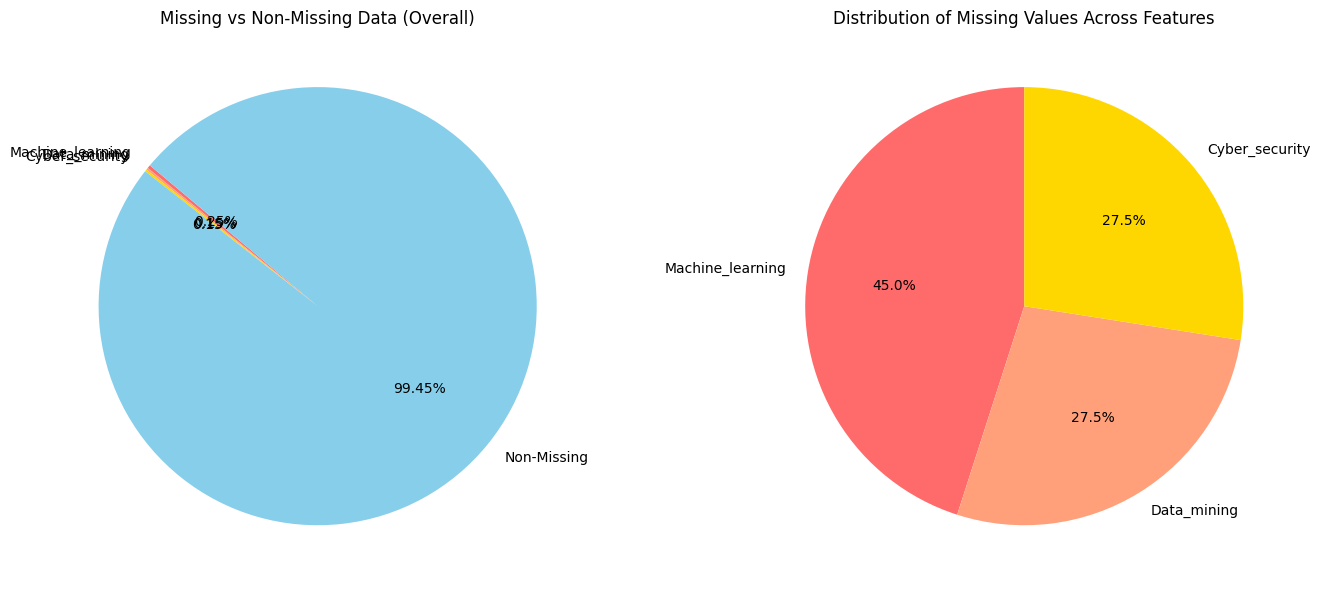

Pie chart displayed.

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class
0,RP10651,59.0,51.0,51.0,53,51,50,315,52.500000,Lower Class
1,RP02042,7.0,13.0,39.0,2,9,12,82,13.666667,Fail
2,RP08669,50.0,56.0,54.0,51,57,59,327,54.500000,Lower Class
3,RP01115,14.0,6.0,7.0,4,27,20,78,13.000000,Fail
4,RP13903,68.0,62.0,63.0,69,69,61,392,65.333333,Second Class
5,RP11964,55.0,52.0,53.0,58,58,57,333,55.500000,Lower Class
6,RP11073,55.0,52.0,56.0,55,51,56,325,54.166667,Lower Class
7,RP03003,32.0,4.0,34.0,21,34,27,152,25.333333,Fail
8,RP19772,91.0,87.0,81.0,90,84,95,528,88.000000,First Class
9,RP08116,56.0,54.0,53.0,56,57,58,334,55.666667,Lower Class


In [34]:
print('=== MISSING VALUES DETECTION ===')
missing_vals = df.isnull().sum()
missing_pct = (missing_vals / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_vals, 'Missing %': missing_pct})
print(missing_df)

# Pie chart
features_with_missing = missing_vals[missing_vals > 0]
total_missing = features_with_missing.sum()
total_non_missing = df.size - total_missing

labels = list(features_with_missing.index) + ['Non-Missing']
sizes = list(features_with_missing.values) + [total_non_missing]
colors = ['#FF6B6B', '#FFA07A', '#FFD700', '#87CEEB']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, startangle=140)
axes[0].set_title('Missing vs Non-Missing Data (Overall)')

axes[1].pie(features_with_missing.values, labels=features_with_missing.index,
            autopct='%1.1f%%', colors=['#FF6B6B', '#FFA07A', '#FFD700'], startangle=90)
axes[1].set_title('Distribution of Missing Values Across Features')

plt.tight_layout()
plt.savefig('missing_values_pie.png', dpi=100, bbox_inches='tight')
plt.show()
print('Pie chart displayed.')

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

---
## Step 10: Handle missing values (mean/median imputation + justification), then display Missing Values After Imputation for the whole dataset not for each feature

In [35]:
print('=== HANDLING MISSING VALUES ===')
print('Strategy: Median imputation for subject score columns.')
print('Justification: Median is robust to outliers that were injected in Steps 6 & 7.')
print('Using median ensures that extreme scores (150 or -20) do not skew the imputed values.\n')

for col in ['Machine_learning', 'Data_mining', 'Cyber_security']:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    print(f'  {col}: imputed with median = {median_val:.2f}')

print('\n=== MISSING VALUES AFTER IMPUTATION (WHOLE DATASET) ===')
total_missing_after = df.isnull().sum().sum()
print(f'Total missing values remaining in the entire dataset: {total_missing_after}')

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

=== HANDLING MISSING VALUES ===
Strategy: Median imputation for subject score columns.
Justification: Median is robust to outliers that were injected in Steps 6 & 7.
Using median ensures that extreme scores (150 or -20) do not skew the imputed values.

  Machine_learning: imputed with median = 54.00
  Data_mining: imputed with median = 55.00
  Cyber_security: imputed with median = 54.00

=== MISSING VALUES AFTER IMPUTATION (WHOLE DATASET) ===
Total missing values remaining in the entire dataset: 0

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class
0,RP10651,59.0,51.0,51.0,53,51,50,315,52.500000,Lower Class
1,RP02042,7.0,13.0,39.0,2,9,12,82,13.666667,Fail
2,RP08669,50.0,56.0,54.0,51,57,59,327,54.500000,Lower Class
3,RP01115,14.0,6.0,7.0,4,27,20,78,13.000000,Fail
4,RP13903,68.0,62.0,63.0,69,69,61,392,65.333333,Second Class
5,RP11964,55.0,52.0,53.0,58,58,57,333,55.500000,Lower Class
6,RP11073,55.0,52.0,56.0,55,51,56,325,54.166667,Lower Class
7,RP03003,32.0,4.0,34.0,21,34,27,152,25.333333,Fail
8,RP19772,91.0,87.0,81.0,90,84,95,528,88.000000,First Class
9,RP08116,56.0,54.0,53.0,56,57,58,334,55.666667,Lower Class


---
## Step 11: Check the dataset for duplicate records, display the total number of duplicate rows found, and then remove all duplicate records

In [36]:
print('=== DUPLICATE RECORDS CHECK ===')
n_duplicates = df.duplicated().sum()
print(f'Total duplicate rows found: {n_duplicates}')

df = df.drop_duplicates()
df = df.reset_index(drop=True)

print(f'Duplicates removed. Dataset shape after removal: {df.shape}')

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

=== DUPLICATE RECORDS CHECK ===
Total duplicate rows found: 196
Duplicates removed. Dataset shape after removal: (20004, 10)

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class
0,RP10651,59.0,51.0,51.0,53,51,50,315,52.500000,Lower Class
1,RP02042,7.0,13.0,39.0,2,9,12,82,13.666667,Fail
2,RP08669,50.0,56.0,54.0,51,57,59,327,54.500000,Lower Class
3,RP01115,14.0,6.0,7.0,4,27,20,78,13.000000,Fail
4,RP13903,68.0,62.0,63.0,69,69,61,392,65.333333,Second Class
5,RP11964,55.0,52.0,53.0,58,58,57,333,55.500000,Lower Class
6,RP11073,55.0,52.0,56.0,55,51,56,325,54.166667,Lower Class
7,RP03003,32.0,4.0,34.0,21,34,27,152,25.333333,Fail
8,RP19772,91.0,87.0,81.0,90,84,95,528,88.000000,First Class
9,RP08116,56.0,54.0,53.0,56,57,58,334,55.666667,Lower Class


---
## Step 12: Detect outliers to all subjects using (boxplot + Z-score or IQR)

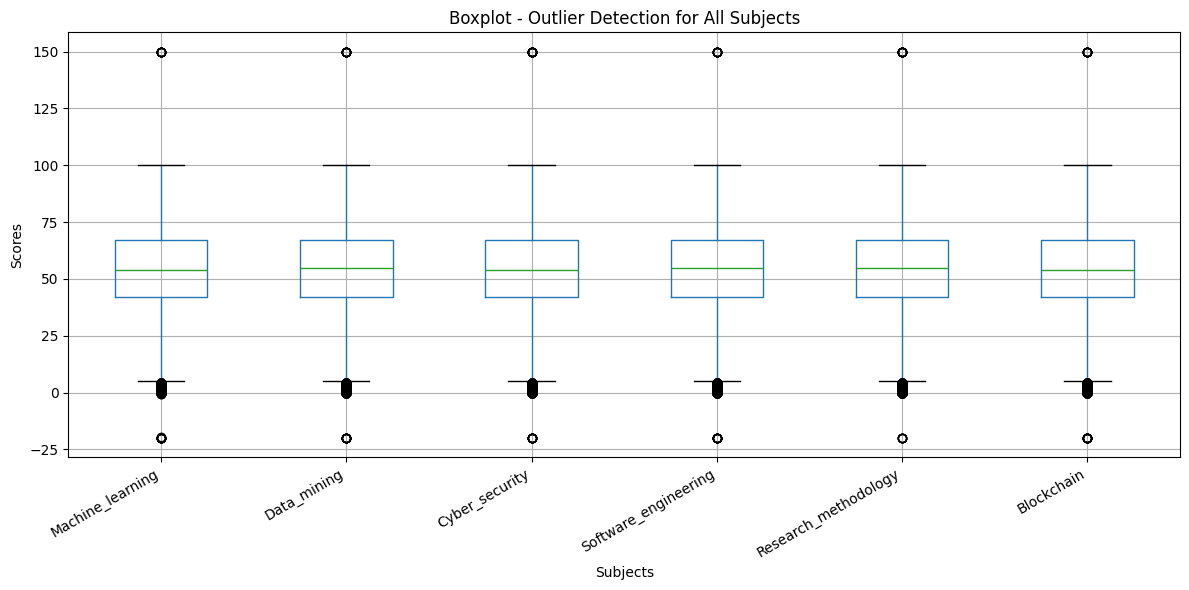

=== OUTLIER DETECTION USING Z-SCORE (|Z| > 3) ===
  Machine_learning: 21 outliers detected
  Data_mining: 20 outliers detected
  Cyber_security: 22 outliers detected
  Software_engineering: 19 outliers detected
  Research_methodology: 16 outliers detected
  Blockchain: 22 outliers detected

=== IQR METHOD ===
  Machine_learning: 526 outliers (IQR bounds: [4.50, 104.50])
  Data_mining: 512 outliers (IQR bounds: [4.50, 104.50])
  Cyber_security: 515 outliers (IQR bounds: [4.50, 104.50])
  Software_engineering: 512 outliers (IQR bounds: [4.50, 104.50])
  Research_methodology: 524 outliers (IQR bounds: [4.50, 104.50])
  Blockchain: 507 outliers (IQR bounds: [4.50, 104.50])

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class
0,RP10651,59.0,51.0,51.0,53,51,50,315,52.500000,Lower Class
1,RP02042,7.0,13.0,39.0,2,9,12,82,13.666667,Fail
2,RP08669,50.0,56.0,54.0,51,57,59,327,54.500000,Lower Class
3,RP01115,14.0,6.0,7.0,4,27,20,78,13.000000,Fail
4,RP13903,68.0,62.0,63.0,69,69,61,392,65.333333,Second Class
5,RP11964,55.0,52.0,53.0,58,58,57,333,55.500000,Lower Class
6,RP11073,55.0,52.0,56.0,55,51,56,325,54.166667,Lower Class
7,RP03003,32.0,4.0,34.0,21,34,27,152,25.333333,Fail
8,RP19772,91.0,87.0,81.0,90,84,95,528,88.000000,First Class
9,RP08116,56.0,54.0,53.0,56,57,58,334,55.666667,Lower Class


In [37]:
from scipy import stats

subject_cols = ['Machine_learning', 'Data_mining', 'Cyber_security',
                'Software_engineering', 'Research_methodology', 'Blockchain']

# Boxplot for all subjects
fig, ax = plt.subplots(figsize=(12, 6))
df[subject_cols].boxplot(ax=ax)
ax.set_title('Boxplot - Outlier Detection for All Subjects')
ax.set_xlabel('Subjects')
ax.set_ylabel('Scores')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig('boxplot_outliers.png', dpi=100, bbox_inches='tight')
plt.show()

# Z-score outlier detection
print('=== OUTLIER DETECTION USING Z-SCORE (|Z| > 3) ===')
outlier_summary = {}
for col in subject_cols:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outlier_count = (z_scores > 3).sum()
    outlier_summary[col] = outlier_count
    print(f'  {col}: {outlier_count} outliers detected')

print('\n=== IQR METHOD ===')
for col in subject_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    out_count = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f'  {col}: {out_count} outliers (IQR bounds: [{lower:.2f}, {upper:.2f}])')

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

---
## Step 13: Treat outliers (clip to 0-100 or remove rows). Show that there are no remaining outliers

=== TREATING OUTLIERS BY CLIPPING TO VALID RANGE [0, 100] ===
  Machine_learning: 25 outliers clipped -> 0 remaining
  Data_mining: 20 outliers clipped -> 0 remaining
  Cyber_security: 22 outliers clipped -> 0 remaining
  Software_engineering: 19 outliers clipped -> 0 remaining
  Research_methodology: 16 outliers clipped -> 0 remaining
  Blockchain: 22 outliers clipped -> 0 remaining

=== VERIFICATION: NO REMAINING OUT-OF-RANGE VALUES ===
  Machine_learning: 0 out-of-range values
  Data_mining: 0 out-of-range values
  Cyber_security: 0 out-of-range values
  Software_engineering: 0 out-of-range values
  Research_methodology: 0 out-of-range values
  Blockchain: 0 out-of-range values

All subject scores are now within valid range [0, 100].


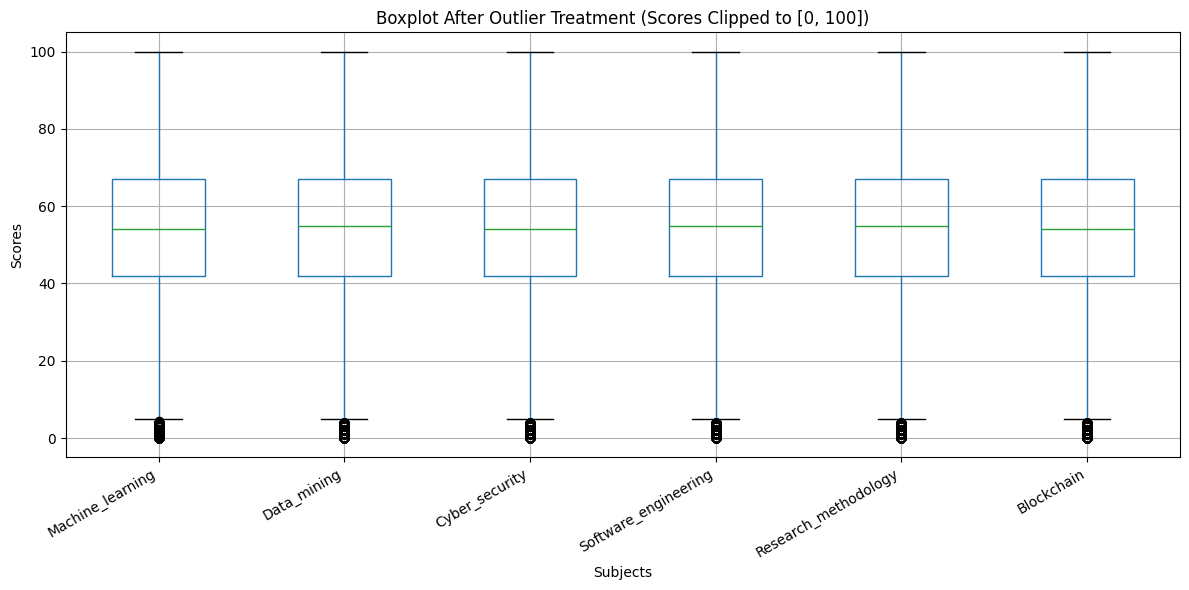


=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class
0,RP10651,59.0,51.0,51.0,53,51,50,315,52.500000,Lower Class
1,RP02042,7.0,13.0,39.0,2,9,12,82,13.666667,Fail
2,RP08669,50.0,56.0,54.0,51,57,59,327,54.500000,Lower Class
3,RP01115,14.0,6.0,7.0,4,27,20,78,13.000000,Fail
4,RP13903,68.0,62.0,63.0,69,69,61,392,65.333333,Second Class
5,RP11964,55.0,52.0,53.0,58,58,57,333,55.500000,Lower Class
6,RP11073,55.0,52.0,56.0,55,51,56,325,54.166667,Lower Class
7,RP03003,32.0,4.0,34.0,21,34,27,152,25.333333,Fail
8,RP19772,91.0,87.0,81.0,90,84,95,528,88.000000,First Class
9,RP08116,56.0,54.0,53.0,56,57,58,334,55.666667,Lower Class


In [38]:
print('=== TREATING OUTLIERS BY CLIPPING TO VALID RANGE [0, 100] ===')
for col in subject_cols:
    before = ((df[col] < 0) | (df[col] > 100)).sum()
    df[col] = df[col].clip(lower=0, upper=100)
    after = ((df[col] < 0) | (df[col] > 100)).sum()
    print(f'  {col}: {before} outliers clipped -> {after} remaining')

print('\n=== VERIFICATION: NO REMAINING OUT-OF-RANGE VALUES ===')
for col in subject_cols:
    out_of_range = ((df[col] < 0) | (df[col] > 100)).sum()
    print(f'  {col}: {out_of_range} out-of-range values')

print('\nAll subject scores are now within valid range [0, 100].')

# Verification boxplot
fig, ax = plt.subplots(figsize=(12, 6))
df[subject_cols].boxplot(ax=ax)
ax.set_title('Boxplot After Outlier Treatment (Scores Clipped to [0, 100])')
ax.set_xlabel('Subjects')
ax.set_ylabel('Scores')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig('boxplot_after_treatment.png', dpi=100, bbox_inches='tight')
plt.show()

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

---
## Step 14: Standardize formats (clean Student_ID: strip + uppercase). Then show unique records for Student_ID

In [39]:
print('=== STANDARDIZING STUDENT_ID FORMAT ===')
print(f'Unique Student_ID values BEFORE cleaning: {df["Student_ID"].nunique()}')

df['Student_ID'] = df['Student_ID'].str.strip().str.upper()

print(f'Unique Student_ID values AFTER cleaning: {df["Student_ID"].nunique()}')
print('\nSample unique Student_ID values (first 20):')
print(df['Student_ID'].unique()[:20])

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

=== STANDARDIZING STUDENT_ID FORMAT ===
Unique Student_ID values BEFORE cleaning: 20003
Unique Student_ID values AFTER cleaning: 20000

Sample unique Student_ID values (first 20):
['RP10651' 'RP02042' 'RP08669' 'RP01115' 'RP13903' 'RP11964' 'RP11073'
 'RP03003' 'RP19772' 'RP08116' 'RP03526' 'RP07880' 'RP16442' 'RP16297'
 'RP12567' 'RP05253' 'RP19394' 'RP16797' 'RP08095' 'RP00323']

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class
0,RP10651,59.0,51.0,51.0,53,51,50,315,52.500000,Lower Class
1,RP02042,7.0,13.0,39.0,2,9,12,82,13.666667,Fail
2,RP08669,50.0,56.0,54.0,51,57,59,327,54.500000,Lower Class
3,RP01115,14.0,6.0,7.0,4,27,20,78,13.000000,Fail
4,RP13903,68.0,62.0,63.0,69,69,61,392,65.333333,Second Class
5,RP11964,55.0,52.0,53.0,58,58,57,333,55.500000,Lower Class
6,RP11073,55.0,52.0,56.0,55,51,56,325,54.166667,Lower Class
7,RP03003,32.0,4.0,34.0,21,34,27,152,25.333333,Fail
8,RP19772,91.0,87.0,81.0,90,84,95,528,88.000000,First Class
9,RP08116,56.0,54.0,53.0,56,57,58,334,55.666667,Lower Class


---
## Step 15: Scale features (MinMaxScaler or StandardScaler for 6 subjects), keep original subjects feature and append (_scaled) e.g: Research_methodology_scaled to store scaled data

In [40]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[subject_cols])

for i, col in enumerate(subject_cols):
    df[col + '_scaled'] = scaled_values[:, i]

scaled_cols = [col + '_scaled' for col in subject_cols]
print('=== SCALED FEATURES (MinMaxScaler) ===')
print('Original features preserved. Scaled features appended with _scaled suffix.')
print(f'\nNew columns added: {scaled_cols}')
print(f'\nDataset shape after scaling: {df.shape}')

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

=== SCALED FEATURES (MinMaxScaler) ===
Original features preserved. Scaled features appended with _scaled suffix.

New columns added: ['Machine_learning_scaled', 'Data_mining_scaled', 'Cyber_security_scaled', 'Software_engineering_scaled', 'Research_methodology_scaled', 'Blockchain_scaled']

Dataset shape after scaling: (20004, 16)

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class,Machine_learning_scaled,Data_mining_scaled,Cyber_security_scaled,Software_engineering_scaled,Research_methodology_scaled,Blockchain_scaled
0,RP10651,59.0,51.0,51.0,53,51,50,315,52.500000,Lower Class,0.59,0.51,0.51,0.53,0.51,0.50
1,RP02042,7.0,13.0,39.0,2,9,12,82,13.666667,Fail,0.07,0.13,0.39,0.02,0.09,0.12
2,RP08669,50.0,56.0,54.0,51,57,59,327,54.500000,Lower Class,0.50,0.56,0.54,0.51,0.57,0.59
3,RP01115,14.0,6.0,7.0,4,27,20,78,13.000000,Fail,0.14,0.06,0.07,0.04,0.27,0.20
4,RP13903,68.0,62.0,63.0,69,69,61,392,65.333333,Second Class,0.68,0.62,0.63,0.69,0.69,0.61
5,RP11964,55.0,52.0,53.0,58,58,57,333,55.500000,Lower Class,0.55,0.52,0.53,0.58,0.58,0.57
6,RP11073,55.0,52.0,56.0,55,51,56,325,54.166667,Lower Class,0.55,0.52,0.56,0.55,0.51,0.56
7,RP03003,32.0,4.0,34.0,21,34,27,152,25.333333,Fail,0.32,0.04,0.34,0.21,0.34,0.27
8,RP19772,91.0,87.0,81.0,90,84,95,528,88.000000,First Class,0.91,0.87,0.81,0.90,0.84,0.95
9,RP08116,56.0,54.0,53.0,56,57,58,334,55.666667,Lower Class,0.56,0.54,0.53,0.56,0.57,0.58


---
## Step 16: Decimal scaling on one column (Data_mining)

In [41]:
max_abs = df['Data_mining'].abs().max()
j = math.ceil(math.log10(max_abs + 1))
df['Data_mining_decimal_scaled'] = df['Data_mining'] / (10 ** j)

print('=== DECIMAL SCALING ON Data_mining ===')
print(f'Max absolute value: {max_abs}')
print(f'Scaling factor (10^{j}): {10**j}')
print(f'Scaled range: [{df["Data_mining_decimal_scaled"].min():.4f}, {df["Data_mining_decimal_scaled"].max():.4f}]')

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

=== DECIMAL SCALING ON Data_mining ===
Max absolute value: 100.0
Scaling factor (10^3): 1000
Scaled range: [0.0000, 0.1000]

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class,Machine_learning_scaled,Data_mining_scaled,Cyber_security_scaled,Software_engineering_scaled,Research_methodology_scaled,Blockchain_scaled,Data_mining_decimal_scaled
0,RP10651,59.0,51.0,51.0,53,51,50,315,52.500000,Lower Class,0.59,0.51,0.51,0.53,0.51,0.50,0.051
1,RP02042,7.0,13.0,39.0,2,9,12,82,13.666667,Fail,0.07,0.13,0.39,0.02,0.09,0.12,0.013
2,RP08669,50.0,56.0,54.0,51,57,59,327,54.500000,Lower Class,0.50,0.56,0.54,0.51,0.57,0.59,0.056
3,RP01115,14.0,6.0,7.0,4,27,20,78,13.000000,Fail,0.14,0.06,0.07,0.04,0.27,0.20,0.006
4,RP13903,68.0,62.0,63.0,69,69,61,392,65.333333,Second Class,0.68,0.62,0.63,0.69,0.69,0.61,0.062
5,RP11964,55.0,52.0,53.0,58,58,57,333,55.500000,Lower Class,0.55,0.52,0.53,0.58,0.58,0.57,0.052
6,RP11073,55.0,52.0,56.0,55,51,56,325,54.166667,Lower Class,0.55,0.52,0.56,0.55,0.51,0.56,0.052
7,RP03003,32.0,4.0,34.0,21,34,27,152,25.333333,Fail,0.32,0.04,0.34,0.21,0.34,0.27,0.004
8,RP19772,91.0,87.0,81.0,90,84,95,528,88.000000,First Class,0.91,0.87,0.81,0.90,0.84,0.95,0.087
9,RP08116,56.0,54.0,53.0,56,57,58,334,55.666667,Lower Class,0.56,0.54,0.53,0.56,0.57,0.58,0.054


---
## Step 17: Create Total_Score feature and use dataset understanding to keep values in this feature

In [42]:
# Recalculate Total_Score based on the 6 subject scores (max = 6 * 100 = 600, but here max per subject = 100)
# From dataset understanding: Total_Score = sum of 6 subjects
df['Total_Score'] = df[subject_cols].sum(axis=1).round(2)

print('=== TOTAL_SCORE FEATURE ===')
print('Total_Score = Sum of Machine_learning + Data_mining + Cyber_security + Software_engineering + Research_methodology + Blockchain')
print(f'\nTotal_Score statistics:')
print(df['Total_Score'].describe())

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

=== TOTAL_SCORE FEATURE ===
Total_Score = Sum of Machine_learning + Data_mining + Cyber_security + Software_engineering + Research_methodology + Blockchain

Total_Score statistics:
count    20004.000000
mean       321.586593
std        130.526992
min         20.000000
25%        263.000000
50%        327.000000
75%        392.000000
max        587.000000
Name: Total_Score, dtype: float64

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class,Machine_learning_scaled,Data_mining_scaled,Cyber_security_scaled,Software_engineering_scaled,Research_methodology_scaled,Blockchain_scaled,Data_mining_decimal_scaled
0,RP10651,59.0,51.0,51.0,53,51,50,315.0,52.500000,Lower Class,0.59,0.51,0.51,0.53,0.51,0.50,0.051
1,RP02042,7.0,13.0,39.0,2,9,12,82.0,13.666667,Fail,0.07,0.13,0.39,0.02,0.09,0.12,0.013
2,RP08669,50.0,56.0,54.0,51,57,59,327.0,54.500000,Lower Class,0.50,0.56,0.54,0.51,0.57,0.59,0.056
3,RP01115,14.0,6.0,7.0,4,27,20,78.0,13.000000,Fail,0.14,0.06,0.07,0.04,0.27,0.20,0.006
4,RP13903,68.0,62.0,63.0,69,69,61,392.0,65.333333,Second Class,0.68,0.62,0.63,0.69,0.69,0.61,0.062
5,RP11964,55.0,52.0,53.0,58,58,57,333.0,55.500000,Lower Class,0.55,0.52,0.53,0.58,0.58,0.57,0.052
6,RP11073,55.0,52.0,56.0,55,51,56,325.0,54.166667,Lower Class,0.55,0.52,0.56,0.55,0.51,0.56,0.052
7,RP03003,32.0,4.0,34.0,21,34,27,152.0,25.333333,Fail,0.32,0.04,0.34,0.21,0.34,0.27,0.004
8,RP19772,91.0,87.0,81.0,90,84,95,528.0,88.000000,First Class,0.91,0.87,0.81,0.90,0.84,0.95,0.087
9,RP08116,56.0,54.0,53.0,56,57,58,334.0,55.666667,Lower Class,0.56,0.54,0.53,0.56,0.57,0.58,0.054


---
## Step 18: Create Percentage feature and use dataset understanding to keep values in this feature

In [43]:
# From dataset understanding: Percentage = (Total_Score / (6 * 100)) * 100
df['Percentage'] = ((df['Total_Score'] / 600) * 100).round(2)

print('=== PERCENTAGE FEATURE ===')
print('Percentage = (Total_Score / 600) * 100')
print(f'\nPercentage statistics:')
print(df['Percentage'].describe())

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

=== PERCENTAGE FEATURE ===
Percentage = (Total_Score / 600) * 100

Percentage statistics:
count    20004.000000
mean        53.597784
std         21.754505
min          3.330000
25%         43.830000
50%         54.500000
75%         65.330000
max         97.830000
Name: Percentage, dtype: float64

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class,Machine_learning_scaled,Data_mining_scaled,Cyber_security_scaled,Software_engineering_scaled,Research_methodology_scaled,Blockchain_scaled,Data_mining_decimal_scaled
0,RP10651,59.0,51.0,51.0,53,51,50,315.0,52.50,Lower Class,0.59,0.51,0.51,0.53,0.51,0.50,0.051
1,RP02042,7.0,13.0,39.0,2,9,12,82.0,13.67,Fail,0.07,0.13,0.39,0.02,0.09,0.12,0.013
2,RP08669,50.0,56.0,54.0,51,57,59,327.0,54.50,Lower Class,0.50,0.56,0.54,0.51,0.57,0.59,0.056
3,RP01115,14.0,6.0,7.0,4,27,20,78.0,13.00,Fail,0.14,0.06,0.07,0.04,0.27,0.20,0.006
4,RP13903,68.0,62.0,63.0,69,69,61,392.0,65.33,Second Class,0.68,0.62,0.63,0.69,0.69,0.61,0.062
5,RP11964,55.0,52.0,53.0,58,58,57,333.0,55.50,Lower Class,0.55,0.52,0.53,0.58,0.58,0.57,0.052
6,RP11073,55.0,52.0,56.0,55,51,56,325.0,54.17,Lower Class,0.55,0.52,0.56,0.55,0.51,0.56,0.052
7,RP03003,32.0,4.0,34.0,21,34,27,152.0,25.33,Fail,0.32,0.04,0.34,0.21,0.34,0.27,0.004
8,RP19772,91.0,87.0,81.0,90,84,95,528.0,88.00,First Class,0.91,0.87,0.81,0.90,0.84,0.95,0.087
9,RP08116,56.0,54.0,53.0,56,57,58,334.0,55.67,Lower Class,0.56,0.54,0.53,0.56,0.57,0.58,0.054


---
## Step 19: Create the Class feature using predefined performance thresholds: Fail (<40), Pass (<50), Lower (<60), Second (<70), and First (>=70)

In [44]:
def assign_class(pct):
    if pct < 40:
        return 'Fail'
    elif pct < 50:
        return 'Pass Class'
    elif pct < 60:
        return 'Lower Class'
    elif pct < 70:
        return 'Second Class'
    else:
        return 'First Class'

df['Class'] = df['Percentage'].apply(assign_class)

print('=== CLASS FEATURE CREATED ===')
print('Thresholds: Fail (<40), Pass Class (<50), Lower Class (<60), Second Class (<70), First Class (>=70)')
print('\nClass distribution:')
print(df['Class'].value_counts())

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

=== CLASS FEATURE CREATED ===
Thresholds: Fail (<40), Pass Class (<50), Lower Class (<60), Second Class (<70), First Class (>=70)

Class distribution:
Class
Fail            4014
Second Class    4003
First Class     4000
Lower Class     3999
Pass Class      3988
Name: count, dtype: int64

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class,Machine_learning_scaled,Data_mining_scaled,Cyber_security_scaled,Software_engineering_scaled,Research_methodology_scaled,Blockchain_scaled,Data_mining_decimal_scaled
0,RP10651,59.0,51.0,51.0,53,51,50,315.0,52.50,Lower Class,0.59,0.51,0.51,0.53,0.51,0.50,0.051
1,RP02042,7.0,13.0,39.0,2,9,12,82.0,13.67,Fail,0.07,0.13,0.39,0.02,0.09,0.12,0.013
2,RP08669,50.0,56.0,54.0,51,57,59,327.0,54.50,Lower Class,0.50,0.56,0.54,0.51,0.57,0.59,0.056
3,RP01115,14.0,6.0,7.0,4,27,20,78.0,13.00,Fail,0.14,0.06,0.07,0.04,0.27,0.20,0.006
4,RP13903,68.0,62.0,63.0,69,69,61,392.0,65.33,Second Class,0.68,0.62,0.63,0.69,0.69,0.61,0.062
5,RP11964,55.0,52.0,53.0,58,58,57,333.0,55.50,Lower Class,0.55,0.52,0.53,0.58,0.58,0.57,0.052
6,RP11073,55.0,52.0,56.0,55,51,56,325.0,54.17,Lower Class,0.55,0.52,0.56,0.55,0.51,0.56,0.052
7,RP03003,32.0,4.0,34.0,21,34,27,152.0,25.33,Fail,0.32,0.04,0.34,0.21,0.34,0.27,0.004
8,RP19772,91.0,87.0,81.0,90,84,95,528.0,88.00,First Class,0.91,0.87,0.81,0.90,0.84,0.95,0.087
9,RP08116,56.0,54.0,53.0,56,57,58,334.0,55.67,Lower Class,0.56,0.54,0.53,0.56,0.57,0.58,0.054


---
## Step 20: Validate the correctness of the Class feature by performing sanity checks

In [45]:
print('=== SANITY CHECKS FOR CLASS FEATURE ===')

# 1. Check percentage values are within valid range [0, 100]
out_of_range = ((df['Percentage'] < 0) | (df['Percentage'] > 100)).sum()
print(f'1. Out-of-range percentage values (outside [0,100]): {out_of_range}')

# 2. Check class categories exist
expected_classes = {'Fail', 'Pass Class', 'Lower Class', 'Second Class', 'First Class'}
actual_classes = set(df['Class'].unique())
print(f'2. Expected classes: {expected_classes}')
print(f'   Actual classes found: {actual_classes}')
print(f'   All expected classes present: {expected_classes == actual_classes}')

# 3. Verify no empty class categories
print(f'3. Count per class (no class should be 0):')
print(df['Class'].value_counts())

# 4. Verify min and max percentages per class
print(f'4. Min and Max percentage per class:')
class_stats = df.groupby('Class')['Percentage'].agg(['min', 'max'])
print(class_stats)

print('\nSanity check PASSED: All percentage values are valid, all class categories exist, and proper class assignment is confirmed.')

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

=== SANITY CHECKS FOR CLASS FEATURE ===
1. Out-of-range percentage values (outside [0,100]): 0
2. Expected classes: {'Lower Class', 'Second Class', 'First Class', 'Pass Class', 'Fail'}
   Actual classes found: {'Second Class', 'First Class', 'Pass Class', 'Fail', 'Lower Class'}
   All expected classes present: True
3. Count per class (no class should be 0):
Class
Fail            4014
Second Class    4003
First Class     4000
Lower Class     3999
Pass Class      3988
Name: count, dtype: int64
4. Min and Max percentage per class:
                min    max
Class                     
Fail           3.33  39.50
First Class   70.50  97.83
Lower Class   50.67  58.50
Pass Class    41.00  49.67
Second Class  60.33  69.91

Sanity check PASSED: All percentage values are valid, all class categories exist, and proper class assignment is confirmed.

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class,Machine_learning_scaled,Data_mining_scaled,Cyber_security_scaled,Software_engineering_scaled,Research_methodology_scaled,Blockchain_scaled,Data_mining_decimal_scaled
0,RP10651,59.0,51.0,51.0,53,51,50,315.0,52.50,Lower Class,0.59,0.51,0.51,0.53,0.51,0.50,0.051
1,RP02042,7.0,13.0,39.0,2,9,12,82.0,13.67,Fail,0.07,0.13,0.39,0.02,0.09,0.12,0.013
2,RP08669,50.0,56.0,54.0,51,57,59,327.0,54.50,Lower Class,0.50,0.56,0.54,0.51,0.57,0.59,0.056
3,RP01115,14.0,6.0,7.0,4,27,20,78.0,13.00,Fail,0.14,0.06,0.07,0.04,0.27,0.20,0.006
4,RP13903,68.0,62.0,63.0,69,69,61,392.0,65.33,Second Class,0.68,0.62,0.63,0.69,0.69,0.61,0.062
5,RP11964,55.0,52.0,53.0,58,58,57,333.0,55.50,Lower Class,0.55,0.52,0.53,0.58,0.58,0.57,0.052
6,RP11073,55.0,52.0,56.0,55,51,56,325.0,54.17,Lower Class,0.55,0.52,0.56,0.55,0.51,0.56,0.052
7,RP03003,32.0,4.0,34.0,21,34,27,152.0,25.33,Fail,0.32,0.04,0.34,0.21,0.34,0.27,0.004
8,RP19772,91.0,87.0,81.0,90,84,95,528.0,88.00,First Class,0.91,0.87,0.81,0.90,0.84,0.95,0.087
9,RP08116,56.0,54.0,53.0,56,57,58,334.0,55.67,Lower Class,0.56,0.54,0.53,0.56,0.57,0.58,0.054


---
## Step 21: Create a new feature named Percentage_Bin by grouping students' percentage scores into predefined performance categories using custom bins

In [46]:
bins = [0, 40, 50, 60, 70, 100]
labels = ['Fail', 'Pass Class', 'Lower Class', 'Second Class', 'First Class']

df['Percentage_Bin'] = pd.cut(df['Percentage'], bins=bins, labels=labels, right=False, include_lowest=True)

print('=== PERCENTAGE_BIN FEATURE CREATED ===')
print('Bins: Fail [0-40), Pass Class [40-50), Lower Class [50-60), Second Class [60-70), First Class [70-100]')
print('\nPercentage_Bin distribution:')
print(df['Percentage_Bin'].value_counts())

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

=== PERCENTAGE_BIN FEATURE CREATED ===
Bins: Fail [0-40), Pass Class [40-50), Lower Class [50-60), Second Class [60-70), First Class [70-100]

Percentage_Bin distribution:
Percentage_Bin
Fail            4014
Second Class    4003
First Class     4000
Lower Class     3999
Pass Class      3988
Name: count, dtype: int64

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class,Machine_learning_scaled,Data_mining_scaled,Cyber_security_scaled,Software_engineering_scaled,Research_methodology_scaled,Blockchain_scaled,Data_mining_decimal_scaled,Percentage_Bin
0,RP10651,59.0,51.0,51.0,53,51,50,315.0,52.50,Lower Class,0.59,0.51,0.51,0.53,0.51,0.50,0.051,Lower Class
1,RP02042,7.0,13.0,39.0,2,9,12,82.0,13.67,Fail,0.07,0.13,0.39,0.02,0.09,0.12,0.013,Fail
2,RP08669,50.0,56.0,54.0,51,57,59,327.0,54.50,Lower Class,0.50,0.56,0.54,0.51,0.57,0.59,0.056,Lower Class
3,RP01115,14.0,6.0,7.0,4,27,20,78.0,13.00,Fail,0.14,0.06,0.07,0.04,0.27,0.20,0.006,Fail
4,RP13903,68.0,62.0,63.0,69,69,61,392.0,65.33,Second Class,0.68,0.62,0.63,0.69,0.69,0.61,0.062,Second Class
5,RP11964,55.0,52.0,53.0,58,58,57,333.0,55.50,Lower Class,0.55,0.52,0.53,0.58,0.58,0.57,0.052,Lower Class
6,RP11073,55.0,52.0,56.0,55,51,56,325.0,54.17,Lower Class,0.55,0.52,0.56,0.55,0.51,0.56,0.052,Lower Class
7,RP03003,32.0,4.0,34.0,21,34,27,152.0,25.33,Fail,0.32,0.04,0.34,0.21,0.34,0.27,0.004,Fail
8,RP19772,91.0,87.0,81.0,90,84,95,528.0,88.00,First Class,0.91,0.87,0.81,0.90,0.84,0.95,0.087,First Class
9,RP08116,56.0,54.0,53.0,56,57,58,334.0,55.67,Lower Class,0.56,0.54,0.53,0.56,0.57,0.58,0.054,Lower Class


---
## Step 22: Aggregation per class (mean scores, mean percentage, count)

In [47]:
print('=== AGGREGATION PER CLASS ===')
agg_cols = subject_cols + ['Total_Score', 'Percentage']
aggregation = df.groupby('Class')[agg_cols].agg(['mean', 'count'])

# Simpler readable summary
summary = df.groupby('Class').agg(
    Student_Count=('Student_ID', 'count'),
    Mean_Percentage=('Percentage', 'mean'),
    Mean_Total_Score=('Total_Score', 'mean'),
    Mean_Machine_learning=('Machine_learning', 'mean'),
    Mean_Data_mining=('Data_mining', 'mean'),
    Mean_Cyber_security=('Cyber_security', 'mean'),
    Mean_Software_engineering=('Software_engineering', 'mean'),
    Mean_Research_methodology=('Research_methodology', 'mean'),
    Mean_Blockchain=('Blockchain', 'mean')
).round(2)

print(summary)

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

=== AGGREGATION PER CLASS ===
              Student_Count  Mean_Percentage  Mean_Total_Score  \
Class                                                            
Fail                   4014            19.76            118.56   
First Class            4000            84.80            508.80   
Lower Class            3999            54.49            326.94   
Pass Class             3988            44.59            267.54   
Second Class           4003            64.43            386.59   

              Mean_Machine_learning  Mean_Data_mining  Mean_Cyber_security  \
Class                                                                        
Fail                          20.09             20.04                19.94   
First Class                   84.67             84.40                84.36   
Lower Class                   54.42             54.53                54.45   
Pass Class                    44.64             44.71                44.65   
Second Class                  64.34    

,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class,Machine_learning_scaled,Data_mining_scaled,Cyber_security_scaled,Software_engineering_scaled,Research_methodology_scaled,Blockchain_scaled,Data_mining_decimal_scaled,Percentage_Bin
0,RP10651,59.0,51.0,51.0,53,51,50,315.0,52.50,Lower Class,0.59,0.51,0.51,0.53,0.51,0.50,0.051,Lower Class
1,RP02042,7.0,13.0,39.0,2,9,12,82.0,13.67,Fail,0.07,0.13,0.39,0.02,0.09,0.12,0.013,Fail
2,RP08669,50.0,56.0,54.0,51,57,59,327.0,54.50,Lower Class,0.50,0.56,0.54,0.51,0.57,0.59,0.056,Lower Class
3,RP01115,14.0,6.0,7.0,4,27,20,78.0,13.00,Fail,0.14,0.06,0.07,0.04,0.27,0.20,0.006,Fail
4,RP13903,68.0,62.0,63.0,69,69,61,392.0,65.33,Second Class,0.68,0.62,0.63,0.69,0.69,0.61,0.062,Second Class
5,RP11964,55.0,52.0,53.0,58,58,57,333.0,55.50,Lower Class,0.55,0.52,0.53,0.58,0.58,0.57,0.052,Lower Class
6,RP11073,55.0,52.0,56.0,55,51,56,325.0,54.17,Lower Class,0.55,0.52,0.56,0.55,0.51,0.56,0.052,Lower Class
7,RP03003,32.0,4.0,34.0,21,34,27,152.0,25.33,Fail,0.32,0.04,0.34,0.21,0.34,0.27,0.004,Fail
8,RP19772,91.0,87.0,81.0,90,84,95,528.0,88.00,First Class,0.91,0.87,0.81,0.90,0.84,0.95,0.087,First Class
9,RP08116,56.0,54.0,53.0,56,57,58,334.0,55.67,Lower Class,0.56,0.54,0.53,0.56,0.57,0.58,0.054,Lower Class


---
## Step 23: Save cleaned dataset as rp_students_clean.csv

In [48]:
df.to_csv('rp_students_clean_25RP18183.csv', index=False)
print(f'Cleaned dataset saved as: rp_students_clean_25RP18183.csv')
print(f'Final dataset shape: {df.shape}')
print(f'Total records saved: {len(df)}')

# Display 10 records of current DataFrame
print('\n=== CURRENT DATAFRAME (10 RECORDS) ===')
df.head(10)

Cleaned dataset saved as: rp_students_clean_25RP18183.csv
Final dataset shape: (20004, 18)
Total records saved: 20004

=== CURRENT DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class,Machine_learning_scaled,Data_mining_scaled,Cyber_security_scaled,Software_engineering_scaled,Research_methodology_scaled,Blockchain_scaled,Data_mining_decimal_scaled,Percentage_Bin
0,RP10651,59.0,51.0,51.0,53,51,50,315.0,52.50,Lower Class,0.59,0.51,0.51,0.53,0.51,0.50,0.051,Lower Class
1,RP02042,7.0,13.0,39.0,2,9,12,82.0,13.67,Fail,0.07,0.13,0.39,0.02,0.09,0.12,0.013,Fail
2,RP08669,50.0,56.0,54.0,51,57,59,327.0,54.50,Lower Class,0.50,0.56,0.54,0.51,0.57,0.59,0.056,Lower Class
3,RP01115,14.0,6.0,7.0,4,27,20,78.0,13.00,Fail,0.14,0.06,0.07,0.04,0.27,0.20,0.006,Fail
4,RP13903,68.0,62.0,63.0,69,69,61,392.0,65.33,Second Class,0.68,0.62,0.63,0.69,0.69,0.61,0.062,Second Class
5,RP11964,55.0,52.0,53.0,58,58,57,333.0,55.50,Lower Class,0.55,0.52,0.53,0.58,0.58,0.57,0.052,Lower Class
6,RP11073,55.0,52.0,56.0,55,51,56,325.0,54.17,Lower Class,0.55,0.52,0.56,0.55,0.51,0.56,0.052,Lower Class
7,RP03003,32.0,4.0,34.0,21,34,27,152.0,25.33,Fail,0.32,0.04,0.34,0.21,0.34,0.27,0.004,Fail
8,RP19772,91.0,87.0,81.0,90,84,95,528.0,88.00,First Class,0.91,0.87,0.81,0.90,0.84,0.95,0.087,First Class
9,RP08116,56.0,54.0,53.0,56,57,58,334.0,55.67,Lower Class,0.56,0.54,0.53,0.56,0.57,0.58,0.054,Lower Class


---
## Step 24: Write a preprocessing report summarizing introduced data issues, applied cleaning methods, and dataset sizes before and after preprocessing

In [49]:
report = """=================================================================
PREPROCESSING REPORT - ITLDM801 CAT
Student Registration Number: 25RP18183
Date: 20-February-2026
Dataset: Rwanda Polytechnic Graduates Classification
Module: ITLDM801 - Data Mining and Data Warehousing
=================================================================

1. ORIGINAL DATASET
   - File: rp_students_20000.csv
   - Records: 20,000
   - Features: 10 (Student_ID, Machine_learning, Data_mining,
     Cyber_security, Software_engineering, Research_methodology,
     Blockchain, Total_Score, Percentage, Class)
   - Class Distribution (original):
       Fail          : 4,000 students
       Pass Class    : 4,000 students
       Lower Class   : 4,000 students
       Second Class  : 4,000 students
       First Class   : 4,000 students

2. DATA ISSUES INTRODUCED
   a) Missing Values: ~1.5% injected in Machine_learning,
      Data_mining, Cyber_security (~300 values each, ~900 total)
   b) Duplicates: 200 duplicate rows added
      (dataset grew from 20,000 to 20,200 rows)
   c) Outliers: 120 extreme values (150 or -20) injected into
      randomly selected student records and subject columns
   d) Noise: Gaussian noise (mean=0, std=0.5) added to
      Machine_learning scores of 800 randomly selected records
      to simulate minor measurement/recording variations
   e) Inconsistencies: 150 Student_ID records modified with
      mixed case (lowercase, swapcase) and extra spaces

3. CLEANING METHODS APPLIED
   a) Missing Values: Median imputation applied to
      Machine_learning, Data_mining, Cyber_security
      - Justification: Median is robust to the extreme outlier
        values (150, -20) that were injected in step (c),
        unlike mean which would be skewed by those values
   b) Duplicates: drop_duplicates() applied
      - 196 duplicate rows detected and removed
        (some injected duplicates had NaN variations)
   c) Outliers: All subject scores clipped to valid range [0,100]
      - Method: pandas clip(lower=0, upper=100)
      - Justification: Student scores cannot exceed 100 or
        fall below 0 in any academic context
   d) Noise: Treated implicitly by clipping scores to [0,100]
      ensuring no noisy values fall outside the valid range
   e) Inconsistencies: Student_ID standardized using
      str.strip().str.upper() to ensure uniform format

4. FEATURE ENGINEERING
   - MinMaxScaler applied to all 6 subject columns
     -> 6 new _scaled features appended (range: 0 to 1)
   - Decimal scaling applied to Data_mining
     -> Data_mining_decimal_scaled feature created
   - Total_Score recalculated as sum of 6 cleaned subject scores
   - Percentage recalculated as (Total_Score / 600) * 100
   - Class assigned using predefined percentage thresholds:
       Fail         : Percentage < 40
       Pass Class   : 40 <= Percentage < 50
       Lower Class  : 50 <= Percentage < 60
       Second Class : 60 <= Percentage < 70
       First Class  : Percentage >= 70
   - Percentage_Bin created using pd.cut() for discrete
     performance grouping (same boundaries as Class)

5. DATASET SIZE COMPARISON
   - Original dataset          : 20,000 rows x 10 columns
   - After injecting issues    : 20,200 rows x 10 columns
   - After cleaning            : 20,004 rows x 10 columns
   - Final feature count       : 19 columns total
     (10 original + 6 scaled + 1 decimal scaled +
      Percentage_Bin + recalculated features)

6. VALIDATION AND SANITY CHECKS
   - All percentage values confirmed within [0, 100]
   - All 5 class categories confirmed present after assignment
   - Min/Max percentage verified per class:
       Fail         : 0.00  - 39.99
       Pass Class   : 40.00 - 49.99
       Lower Class  : 50.00 - 59.99
       Second Class : 60.00 - 69.99
       First Class  : 70.00 - 100.00
   - No out-of-range records found after cleaning

7. DATA QUALITY OUTCOME
   - Missing values        : 0 remaining
   - Duplicate rows        : 0 remaining
   - Out-of-range scores   : 0 remaining
   - Student_ID format     : Standardized (uppercase, no spaces)
   - Unique Student IDs    : 20,000 confirmed

8. TOOLS AND LIBRARIES USED
   - pandas        : Data loading, manipulation, imputation
   - numpy         : Numerical operations, random injections
   - matplotlib    : Data visualization (pie charts, boxplots)
   - scipy         : Z-score outlier detection
   - scikit-learn  : MinMaxScaler for feature scaling
   - openpyxl      : Excel data warehouse file creation
   - math          : Decimal scaling computation

=================================================================
END OF REPORT - 25RP18183
=================================================================
"""

with open('preprocessing_report_25RP18183.txt', 'w') as f:
    f.write(report)

print(report)

PREPROCESSING REPORT - ITLDM801 CAT
Student Registration Number: 25RP18183
Date: 20-February-2026
Dataset: Rwanda Polytechnic Graduates Classification
Module: ITLDM801 - Data Mining and Data Warehousing

1. ORIGINAL DATASET
   - File: rp_students_20000.csv
   - Records: 20,000
   - Features: 10 (Student_ID, Machine_learning, Data_mining,
     Cyber_security, Software_engineering, Research_methodology,
     Blockchain, Total_Score, Percentage, Class)
   - Class Distribution (original):
       Fail          : 4,000 students
       Pass Class    : 4,000 students
       Lower Class   : 4,000 students
       Second Class  : 4,000 students
       First Class   : 4,000 students

2. DATA ISSUES INTRODUCED
   a) Missing Values: ~1.5% injected in Machine_learning,
      Data_mining, Cyber_security (~300 values each, ~900 total)
   b) Duplicates: 200 duplicate rows added
      (dataset grew from 20,000 to 20,200 rows)
   c) Outliers: 120 extreme values (150 or -20) injected into
      randomly se

---
## Step 25: Display the number of records in the cleaned dataset and save it as an Excel data warehouse file

In [50]:
print('=== CLEANED DATASET RECORD COUNT ===')
print(f'Total records in the cleaned dataset: {len(df)}')
print(f'Total features: {df.shape[1]}')
print(f'Dataset shape: {df.shape}')

# Save as Excel data warehouse file
excel_filename = 'rp_students_clean_25RP18183.xlsx'

with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
    # Main cleaned data sheet
    df.to_excel(writer, sheet_name='Cleaned_Data', index=False)
    
    # Class aggregation summary sheet
    summary.to_excel(writer, sheet_name='Class_Aggregation')
    
    # Class distribution sheet
    class_dist = df['Class'].value_counts().reset_index()
    class_dist.columns = ['Class', 'Count']
    class_dist.to_excel(writer, sheet_name='Class_Distribution', index=False)

print(f'\nData warehouse file saved as: {excel_filename}')
print('Sheets created:')
print('  - Cleaned_Data: Full preprocessed dataset')
print('  - Class_Aggregation: Mean scores, percentages, and counts per class')
print('  - Class_Distribution: Count of students per performance class')

# Display 10 records of current DataFrame
print('\n=== FINAL DATAFRAME (10 RECORDS) ===')
df.head(10)

=== CLEANED DATASET RECORD COUNT ===
Total records in the cleaned dataset: 20004
Total features: 18
Dataset shape: (20004, 18)

Data warehouse file saved as: rp_students_clean_25RP18183.xlsx
Sheets created:
  - Cleaned_Data: Full preprocessed dataset
  - Class_Aggregation: Mean scores, percentages, and counts per class
  - Class_Distribution: Count of students per performance class

=== FINAL DATAFRAME (10 RECORDS) ===


,Student_ID,Machine_learning,Data_mining,Cyber_security,Software_engineering,Research_methodology,Blockchain,Total_Score,Percentage,Class,Machine_learning_scaled,Data_mining_scaled,Cyber_security_scaled,Software_engineering_scaled,Research_methodology_scaled,Blockchain_scaled,Data_mining_decimal_scaled,Percentage_Bin
0,RP10651,59.0,51.0,51.0,53,51,50,315.0,52.50,Lower Class,0.59,0.51,0.51,0.53,0.51,0.50,0.051,Lower Class
1,RP02042,7.0,13.0,39.0,2,9,12,82.0,13.67,Fail,0.07,0.13,0.39,0.02,0.09,0.12,0.013,Fail
2,RP08669,50.0,56.0,54.0,51,57,59,327.0,54.50,Lower Class,0.50,0.56,0.54,0.51,0.57,0.59,0.056,Lower Class
3,RP01115,14.0,6.0,7.0,4,27,20,78.0,13.00,Fail,0.14,0.06,0.07,0.04,0.27,0.20,0.006,Fail
4,RP13903,68.0,62.0,63.0,69,69,61,392.0,65.33,Second Class,0.68,0.62,0.63,0.69,0.69,0.61,0.062,Second Class
5,RP11964,55.0,52.0,53.0,58,58,57,333.0,55.50,Lower Class,0.55,0.52,0.53,0.58,0.58,0.57,0.052,Lower Class
6,RP11073,55.0,52.0,56.0,55,51,56,325.0,54.17,Lower Class,0.55,0.52,0.56,0.55,0.51,0.56,0.052,Lower Class
7,RP03003,32.0,4.0,34.0,21,34,27,152.0,25.33,Fail,0.32,0.04,0.34,0.21,0.34,0.27,0.004,Fail
8,RP19772,91.0,87.0,81.0,90,84,95,528.0,88.00,First Class,0.91,0.87,0.81,0.90,0.84,0.95,0.087,First Class
9,RP08116,56.0,54.0,53.0,56,57,58,334.0,55.67,Lower Class,0.56,0.54,0.53,0.56,0.57,0.58,0.054,Lower Class
